![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [21]:
# data manipulation
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# data modeling 
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm
from tqdm.notebook import tqdm

# machine learning algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

import warnings

%matplotlib inline
sns.set_style(style="darkgrid")
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

df = pd.read_csv(filepath_or_buffer=r"D:\Python\data analysis projects\Predicting Healthcare Insurance Costs\Regression-Example\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


## Missing data and data shape and datatype

In [22]:
df.charges.replace(to_replace="$nan", value=np.nan, inplace=True)
df.charges.replace(to_replace="^\$", value="",regex= True,  inplace=True)
df.charges = df.charges.astype(dtype=np.float64)

In [23]:
def standardize_region(title: str)  -> str: return title.lower()
df.region = df.region.apply(func=lambda x : standardize_region(title=x) if isinstance(x, str) else x)

In [24]:
# Convert to string and replace leading negatives
df['children'] = df['children'].astype(dtype=str).replace(to_replace="^-", value="", regex=True)

# Convert back to numeric
df['children'] = pd.to_numeric(arg=df['children'], errors="coerce")
df.children.value_counts(dropna=False)

children
0.0    551
1.0    312
2.0    221
3.0    149
NaN     66
4.0     23
5.0     16
Name: count, dtype: int64

In [25]:

df.sex.replace(to_replace= ["man", "M", "woman", "F"], value=["male", "male", "female", "female"], inplace=True)

In [26]:

df.age = df.age.astype(dtype=str).replace(to_replace="^-", value="", regex=True)
df.age = pd.to_numeric(arg=df.age, errors="coerce")


In [27]:
df.dropna(inplace=True)
df.reset_index(drop=False)

,index,age,sex,bmi,children,smoker,region,charges
0,0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1202,1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1203,1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1204,1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1205,1336,21.0,female,25.800,0.0,no,southwest,2007.94500


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

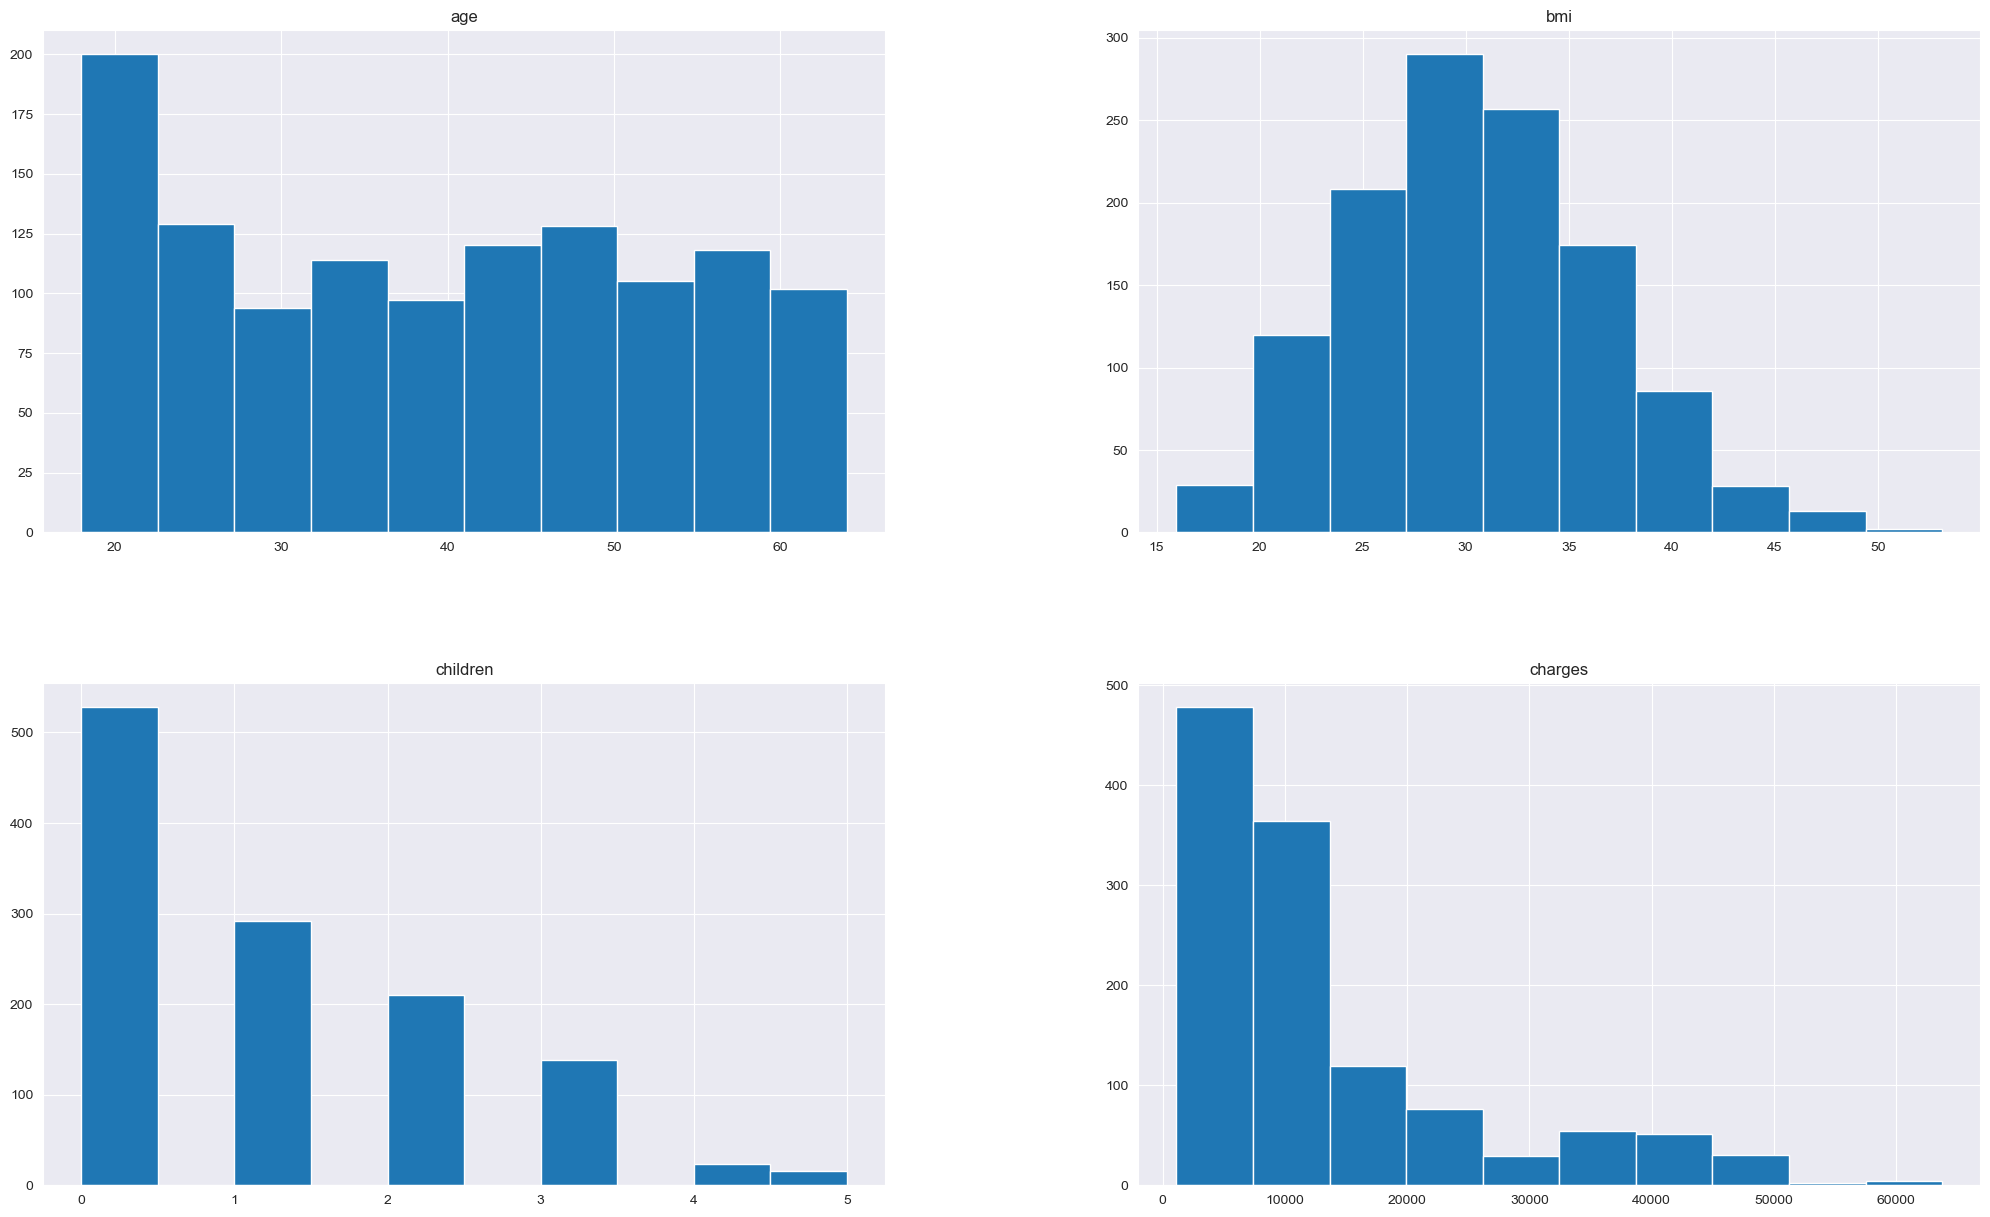

In [28]:
df.hist(figsize=(25,15))

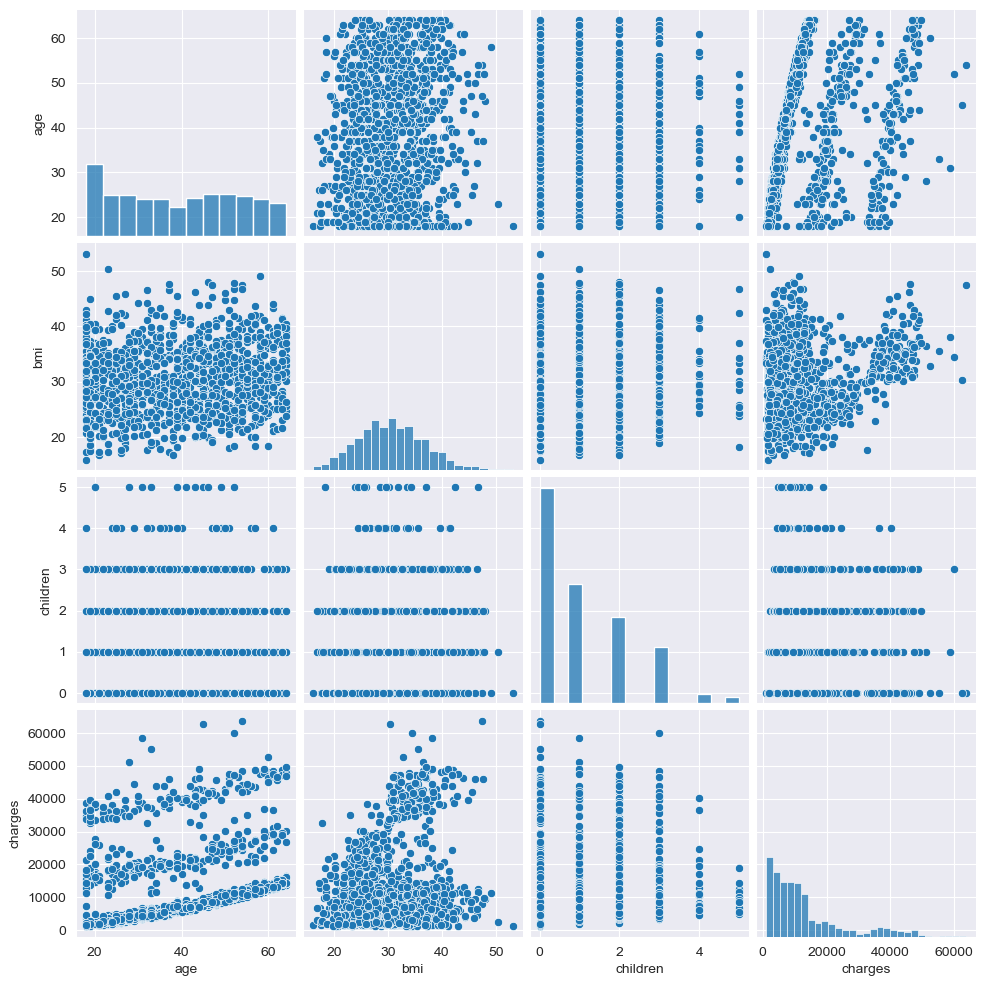

In [29]:
sns.pairplot(data=df)

<Axes: xlabel='charges'>

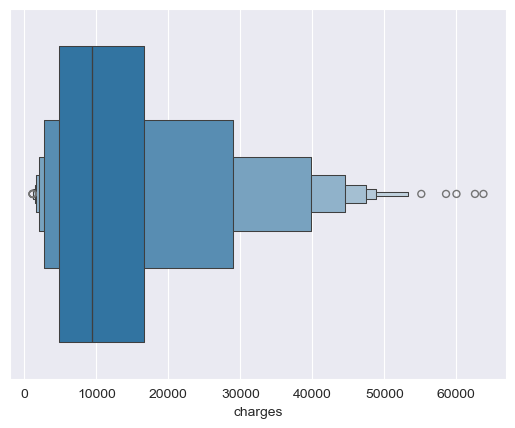

In [30]:
sns.boxenplot(data=df.charges, orient="h")

In [31]:
dummies: DataFrame = pd.get_dummies(data=df[["sex", "smoker", "region"]]).astype(dtype=np.int16)
dummies

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [32]:
from copy import deepcopy

df1: DataFrame = deepcopy(x=df)

df1.drop(columns=df1[["sex", "smoker", "region"]], inplace=True)
df1 = pd.concat(objs=[dummies, df1], axis=1)
df1

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1,0,0,1,0,0,0,1,19.0,27.900,0.0,16884.92400
1,0,1,1,0,0,0,1,0,18.0,33.770,1.0,1725.55230
2,0,1,1,0,0,0,1,0,28.0,33.000,3.0,4449.46200
3,0,1,1,0,0,1,0,0,33.0,22.705,0.0,21984.47061
4,0,1,1,0,0,1,0,0,32.0,28.880,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0,50.0,30.970,3.0,10600.54830
1334,1,0,1,0,1,0,0,0,18.0,31.920,0.0,2205.98080
1335,1,0,1,0,0,0,1,0,18.0,36.850,0.0,1629.83350
1336,1,0,1,0,0,0,0,1,21.0,25.800,0.0,2007.94500


In [33]:
scaler = StandardScaler()
df1[["age", "bmi"]] = scaler.fit_transform(X=df1[["age", "bmi"]])
df2 = df1.copy()

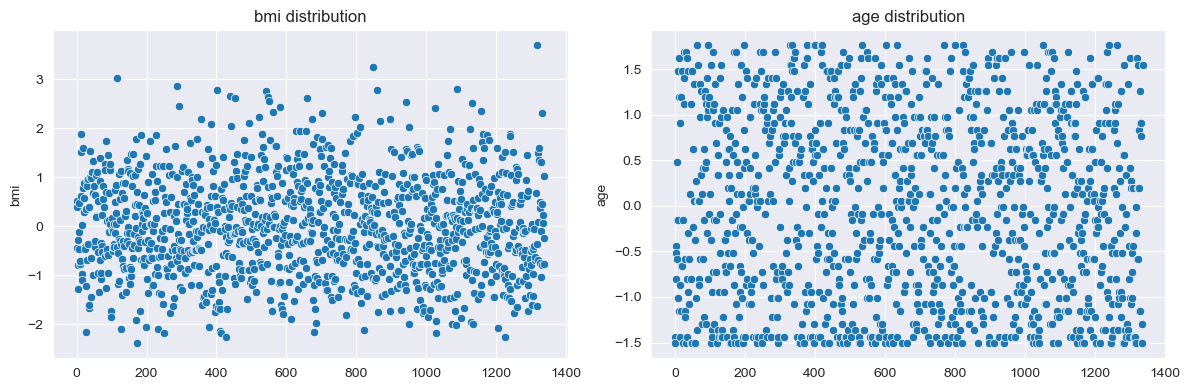

In [34]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(data=df1.bmi)
plt.title("bmi distribution")
plt.tight_layout()
plt.subplot(1,2,2)
sns.scatterplot(data=df1.age)
plt.title("age distribution")
plt.tight_layout()

## Preparing full linear Regression report

In [35]:
import os

X = df1.drop(labels="charges", axis=1)
y = df1.iloc[:,-1]

formula = f"y ~ {' + '.join(i for i in X.columns)}"

model = smf.ols(formula=formula, data=df1).fit()
model.summary()

r_squared = model.rsquared 
df_model = model.df_model # feature in the model
df_resid = model.df_resid  # degrees of freedom


"""all feature in the model"""

mallow_cp = df_model + 1

model.summary()

anova_result = anova_lm(model).reset_index()
RMSE = np.sqrt(anova_result.loc[11 , "mean_sq"])
MSE_K: np.float64 = anova_result.loc[11 , "mean_sq"]

vif: list[np.float64] = [variance_inflation_factor(exog=X.values, exog_idx=i) for i in range(X.shape[1])]
vif_df = pd.DataFrame(data={"labels": X.columns, "vif": vif}).drop(index=0, axis=0).reset_index(drop=True)


anova_result["vif"] = vif_df["vif"] 

# semi partial correlation
squared_semi_partial_correlation = []
for f_ratio in anova_result["F"]:
    if f_ratio  == np.nan:
        continue
    
    feature_efficiency = (f_ratio / df_resid) * (1 - r_squared)
    squared_semi_partial_correlation.append(feature_efficiency)



anova_result["squared_semi_partial_correlation"] = squared_semi_partial_correlation

numerical_columns: list[str] = anova_result.select_dtypes(include="number", exclude="object").columns.tolist()
anova_result[numerical_columns] = anova_result[numerical_columns].applymap(lambda x : f"{x:.3f}" if isinstance(x, (float, int)) else x)
anova_result.sort_values(by="squared_semi_partial_correlation", ascending=False, inplace=True)

with open(file=os.path.join(os.getcwd(), "ols_report.txt"), mode="w") as file:
    file.write(f"the whole dataset with all feature in OLS model\n".title())
    file.write(f"{model.summary()}\n\n".title())
    file.write(
        f"r squared: {r_squared}, model degree of freedom: {df_model}, \
            degree of freedom residuals : {df_resid}, data : {df1.shape}\n".title()
    )
    file.write(f"mallow_cp: {mallow_cp}\n")
    file.write("standard error of the regression\n".title())
    file.write(f"root mean squared error: {RMSE}\n".title())
    file.write(f"{anova_result}")



In [36]:
import plotly.express as px
px.box(data_frame=df1.charges, orientation="h")

In [37]:
X = df1.drop(labels=["sex_male", "region_northeast", "region_northwest", "region_southeast", "region_southwest", "smoker_yes" , "sex_female", "children", "charges"]
, axis=1)
y = df1.iloc[:,-1]

formula = f"y ~ {' + '.join(i for i in X.columns)}"

model = smf.ols(formula=formula, data=df1).fit()
model.summary()

r_squared = model.rsquared 
df_model = model.df_model # feature in the model
df_resid = model.df_resid  # degrees of freedom

mallow_cp = df_model + 1

model.summary()

anova_result = anova_lm(model).reset_index()
RMSE = np.sqrt(anova_result["mean_sq"].iloc[0])

vif: list[np.float64] = [variance_inflation_factor(exog=X.values, exog_idx=i) for i in range(X.shape[1])]
vif_df = pd.DataFrame({"labels": X.columns, "vif": vif}).drop(index=0, axis=0).reset_index(drop=True)

SSE_P: np.float64 = anova_result.loc[3, "sum_sq"]

mallow_cp = (SSE_P / MSE_K) +( 2 * (df_model + 1)) - len(y)
anova_result["vif"] = vif_df["vif"] 

# semi partial correlation
squared_semi_partial_correlation = []
for f_ratio in anova_result["F"]:
    if f_ratio  == np.nan:
        continue
    
    feature_efficiency = (f_ratio / df_resid) * (1 - r_squared)
    squared_semi_partial_correlation.append(feature_efficiency)
anova_result["squared_semi_partial_correlation"] = squared_semi_partial_correlation

numerical_columns: list[str] = anova_result.select_dtypes(include="number", exclude="object").columns.tolist()
anova_result[numerical_columns] = anova_result[numerical_columns].applymap(lambda x : f"{x:.3f}" if isinstance(x, (float, int)) else x)
anova_result.sort_values(by="squared_semi_partial_correlation", ascending=False, inplace=True)


with open(file=os.path.join(os.getcwd(), "ols_report.txt"), mode="a") as file:
    file.write(f"\n\nthe updated model in OLS model\n".title())
    file.write(f"{model.summary()}\n\n".title())
    file.write(
        f"r squared: {r_squared}, model degree of freedom: {df_model}, \
            degree of freedom residuals : {df_resid}, data : {df1.shape}\n".title()
    )
    file.write(f"mallow_cp: {mallow_cp}\n")
    file.write("standard error of the regression\n".title())
    file.write(f"root mean squared error: {RMSE}\n".title())
    file.write(f"{anova_result}")

In [38]:
from sklearn.model_selection import train_test_split, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=11)

def ridge_alpha_score():
    best_alpha = -np.inf
    best_score = -np.inf
    
    alphas = np.linspace(start=1, stop=1000, num=10_000)
    for alpha in tqdm(alphas, desc="alpha tuning: ".title()):
        fold_scores = []
        for train_index, test_index in KFold(n_splits=10, shuffle=True, random_state=11).split(X=X_train):
            X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
            
            ridge: Ridge = Ridge(alpha=alpha).fit(X=X_train_fold, y=y_train_fold)
            score = ridge.score(X=X_test_fold, y=y_test_fold)
            fold_scores.append(score)
        
        mean_score = np.mean(fold_scores)
        if mean_score > best_score:
            best_score = mean_score
            best_alpha = alpha
    return best_alpha, best_score

def lasso_alpha_score(): 
    best_alpha = -np.inf
    best_score = -np.inf
    
    alphas = np.linspace(start=1, stop=1000, num=10_000)
    for alpha in tqdm(alphas, desc="lasso tuning: ".title()):
        fold_scores = []
        for train_index, test_index in KFold(n_splits=10, shuffle=True, random_state=11).split(X=X_train):
            X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
            
            lasso: Lasso = Lasso(alpha=alpha).fit(X=X_train_fold, y=y_train_fold)
            score = lasso.score(X=X_test_fold, y=y_test_fold)
            fold_scores.append(score)
        
        mean_score = np.mean(fold_scores)
        if mean_score > best_score:
            best_score = mean_score
            best_alpha = alpha
    return best_alpha, best_score

best_alpha_ridge, best_score = ridge_alpha_score()
print(f"Ridge: best alpha: {best_alpha_ridge}, best score: {best_score:.3f}".title())
best_alpha_lasso, best_score = lasso_alpha_score()
print(f"lasso: best alpha: {best_alpha_lasso}, best score: {best_score:.3f}".title())

linear_regression: LinearRegression = LinearRegression().fit(X=X_train, y=y_train)
lr_score = linear_regression.score(X=X_test, y=y_test)
print(f"R-squared in linear regression : {lr_score:.3f}")

Alpha Tuning:   0%|          | 0/10000 [00:00<?, ?it/s]

Ridge: Best Alpha: 1.5994599459945995, Best Score: 0.747


Lasso Tuning:   0%|          | 0/10000 [00:00<?, ?it/s]

Lasso: Best Alpha: 52.45364536453645, Best Score: 0.747
R-squared in linear regression : 0.707


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# ridge
ridge =  Ridge(alpha=best_alpha_ridge).fit(X=X_train, y=y_train)
y_predict =ridge.predict(X=X_test)
ridge_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
ridge_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
ridge_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)

print(f"Ridge:\nmean squared error: {ridge_mse:.3f}\nroot mean squared error: {(np.sqrt(ridge_mse)):.3f}\nr-squared: {ridge_r_squared:.3f}\nmean absolute error: {ridge_mbe:.3f}")

# lasso
lasso =  Lasso(alpha=best_alpha_lasso).fit(X=X_train, y=y_train)
y_predict =lasso.predict(X=X_test)
lasso_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
lasso_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
lasso_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)
print()
print(f"lasso: Winner\nmean squared error: {lasso_mse:.3f}\nroot mean squared error: {(np.sqrt(lasso_mse)):.3f}\nr-squared: {lasso_r_squared:.3f}\nmean absolute error: {lasso_mbe:.3f}")

# linear regression
linear_regression: LinearRegression = LinearRegression().fit(X=X_train, y=y_train)
y_predict = linear_regression.predict(X=X_test)
lr_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
lr_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
lr_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)
print()
print(f"linear regression:\nmean squared error: {lr_mse:.3f}\nroot mean squared error: {(np.sqrt(lr_mse)):.3f}\nr-squared: {lr_r_squared:.3f}\nmean absolute error: {lr_mbe:.3f}")


Ridge:
mean squared error: 40059429.247
root mean squared error: 6329.252
r-squared: 0.708
mean absolute error: 4277.448

lasso: Winner
mean squared error: 40034519.105
root mean squared error: 6327.284
r-squared: 0.708
mean absolute error: 4265.982

linear regression:
mean squared error: 40188487.858
root mean squared error: 6339.439
r-squared: 0.707
mean absolute error: 4264.609


In [44]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
df2

kf = KFold(n_splits=10, shuffle=True, random_state=11)

grid = {
    "RandomForestRegressor": {
        "model": RandomForestRegressor(),
        "param": {
            "n_estimators": [100, 200, 300, 500],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "min_weight_fraction_leaf": [0.0, 0.01, 0.02],
            "oob_score": [True],
            "n_jobs": [-1],
            "bootstrap": [True]
        }
    },
    "AdaBoostRegressor": {
        "model": AdaBoostRegressor(),
        "param": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.5, 1.0],
            "loss": ["linear", "square", "exponential"]
        }
    },
    "ExtraTreesRegressor": {
        "model": ExtraTreesRegressor(),
        "param": {
            "n_estimators": [100, 200, 300, 500],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": ["auto", "sqrt", "log2"],
            "bootstrap": [False, True],
            "n_jobs": [-1]
        }
    },
    "GradientBoostingRegressor": {
    "model": GradientBoostingRegressor(),
    "param": {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5],
        "subsample": [0.8, 1.0]
    }
},
"LGBMRegressor": {
    "model": LGBMRegressor(),
    "param": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1],
        "max_depth": [-1, 5],
        "num_leaves": [31, 50],
        "feature_fraction": [0.8, 1.0]
    }
},
"XGBRegressor": {
    "model": XGBRegressor(),
    "param": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5],
        "colsample_bytree": [0.8, 1.0],
        "subsample": [0.8, 1.0]
        }
    },
    "SVR": {
        "model": SVR(),
        "param": {
            "kernel": ["linear", "poly", "rbf"],
            "C": [0.1, 1, 10],
            "epsilon": [0.01, 0.1, 0.5],
            "gamma": ["scale", "auto"]
        }
    }
}

"mp => model & parameters"
grid_search_result = []
for model, mp in tqdm(grid.items(), desc="hyperparameter tuning: ".title()):
    gs = GridSearchCV(estimator=mp["model"], param_grid=mp["param"], scoring="r2", cv=kf, n_jobs=-1, return_train_score=False)
    gs.fit(X=X_train, y=y_train)
    gs_df = pd.DataFrame(data=gs.cv_results_)
    gs_df["model"] = model
    grid_search_result.append(gs_df)

grid_df = pd.concat(objs=grid_search_result, ignore_index=True)
grid_df

Hyperparameter Tuning:   0%|          | 0/7 [00:00<?, ?it/s]

  File "c:\Users\ahm_ed\anaconda3\envs\tensor\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\ahm_ed\anaconda3\envs\tensor\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\ahm_ed\anaconda3\envs\tensor\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ahm_ed\anaconda3\envs\tensor\lib\subprocess.py", line 1440, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 844, number of used features: 3
[LightGBM] [Info] Start training from score 13363.188696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_min_samples_leaf,param_min_samples_split,param_min_weight_fraction_leaf,param_n_estimators,param_n_jobs,...,param_max_features,param_max_depth,param_subsample,param_feature_fraction,param_num_leaves,param_colsample_bytree,param_C,param_epsilon,param_gamma,param_kernel
0,0.399192,0.068841,0.128950,0.028012,True,1.0,2.0,0.00,100.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.730363,0.129472,0.198386,0.118538,True,1.0,2.0,0.00,200.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.287989,0.172084,0.184669,0.022351,True,1.0,2.0,0.00,300.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.096551,0.123115,0.151253,0.012642,True,1.0,2.0,0.00,500.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.513428,0.070796,0.161196,0.061573,True,1.0,2.0,0.01,100.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0.051722,0.004781,0.007041,0.001172,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.5,scale,poly
490,0.061708,0.006541,0.013832,0.001703,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.5,scale,rbf
491,0.045822,0.003608,0.005957,0.000555,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.5,auto,linear
492,0.047958,0.005368,0.006410,0.000548,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.5,auto,poly


In [49]:
pd.set_option("display.max_column", None)
light_grid_df = grid_df[["model" ,"params", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False)
light_grid_df

,model,params,mean_test_score
81,RandomForestRegressor,"{'bootstrap': True, 'min_samples_leaf': 4, 'mi...",0.857536
32,RandomForestRegressor,"{'bootstrap': True, 'min_samples_leaf': 1, 'mi...",0.857509
106,RandomForestRegressor,"{'bootstrap': True, 'min_samples_leaf': 4, 'mi...",0.857469
21,RandomForestRegressor,"{'bootstrap': True, 'min_samples_leaf': 1, 'mi...",0.857447
57,RandomForestRegressor,"{'bootstrap': True, 'min_samples_leaf': 2, 'mi...",0.857445
...,...,...,...
283,ExtraTreesRegressor,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN
284,ExtraTreesRegressor,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN
285,ExtraTreesRegressor,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN
286,ExtraTreesRegressor,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN


In [ ]:
model_groups = light_grid_df.groupby(by="model")

best_models = []
for i in model_groups.groups.keys():
    model = model_groups.get_group(i).iloc[0].to_dict()
    best_models.append(model)

best_models = pd.DataFrame(data=best_models)
best_models = best_models.drop(index=5).reset_index(drop=True)

,model,params,mean_test_score
0,AdaBoostRegressor,"{'learning_rate': 0.01, 'loss': 'exponential',...",0.851866
1,ExtraTreesRegressor,"{'bootstrap': False, 'max_features': 'sqrt', '...",0.838690
2,GradientBoostingRegressor,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.856158
3,LGBMRegressor,"{'feature_fraction': 1.0, 'learning_rate': 0.1...",0.845860
4,RandomForestRegressor,"{'bootstrap': True, 'min_samples_leaf': 4, 'mi...",0.857536
5,XGBRegressor,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.850183


In [88]:
ada = AdaBoostRegressor(learning_rate=0.01, loss="exponential", n_estimators=50)
extra_tree = ExtraTreesRegressor(n_estimators=300, min_samples_leaf=1, min_samples_split=10, max_features="sqrt", bootstrap=True, n_jobs=-1)
gradient_boost =GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8)
light_gbm = LGBMRegressor(feature_fraction= 1.0, learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=50)
random_forest = RandomForestRegressor(n_estimators=200,bootstrap=True, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.02, oob_score=True, n_jobs=-1)
xgboost = XGBRegressor(colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8)

In [90]:
estimator_list = [
    ("AdaBoostRegressor", ada),
    ("ExtraTreesRegressor", extra_tree),
    ("GradientBoostingRegressor", gradient_boost),
    ("LGBMRegressor", light_gbm),
    ("RandomForest", random_forest),
    ("XGBRegressor", xgboost)
]

stacking = StackingRegressor(estimators=estimator_list, final_estimator=xgboost, cv=kf, n_jobs=-1).fit(X=X_train, y=y_train)
stacking

StackingRegressor(cv=KFold(n_splits=10, random_state=11, shuffle=True),
                  estimators=[('AdaBoostRegressor',
                               AdaBoostRegressor(learning_rate=0.01,
                                                 loss='exponential')),
                              ('ExtraTreesRegressor',
                               ExtraTreesRegressor(bootstrap=True,
                                                   max_features='sqrt',
                                                   min_samples_split=10,
                                                   n_estimators=300,
                                                   n_jobs=-1)),
                              ('GradientBoostingRegressor',
                               GradientBoostingRegressor(n_estim...
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.1, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=3,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...),
                  n_jobs=-1)

In [91]:
y_predict = stacking.predict(X=X_test)
stacking_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
stacking_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
stacking_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)
print()
print(f"stacking:\nmean squared error: {stacking_mse:.3f}\nroot mean squared error: {(np.sqrt(stacking_mse)):.3f}\nr-squared: {stacking_r_squared:.3f}\nmean absolute error: {stacking_mbe:.3f}")


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0

stacking:
mean squared error: 25566085.998
root mean squared error: 5056.292
r-squared: 0.814
mean absolute error: 2752.050


In [92]:
stacking = StackingRegressor(estimators=estimator_list, final_estimator=random_forest, cv=kf, n_jobs=-1).fit(X=X_train, y=y_train)
y_predict = stacking.predict(X=X_test)
stacking_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
stacking_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
stacking_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)
print()
print(f"stacking:\nmean squared error: {stacking_mse:.3f}\nroot mean squared error: {(np.sqrt(stacking_mse)):.3f}\nr-squared: {stacking_r_squared:.3f}\nmean absolute error: {stacking_mbe:.3f}")


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0

stacking:
mean squared error: 24886307.006
root mean squared error: 4988.618
r-squared: 0.819
mean absolute error: 2741.121


In [93]:
stacking = StackingRegressor(estimators=estimator_list, final_estimator=light_gbm, cv=kf, n_jobs=-1).fit(X=X_train, y=y_train)
y_predict = stacking.predict(X=X_test)
stacking_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
stacking_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
stacking_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)
print()
print(f"stacking:\nmean squared error: {stacking_mse:.3f}\nroot mean squared error: {(np.sqrt(stacking_mse)):.3f}\nr-squared: {stacking_r_squared:.3f}\nmean absolute error: {stacking_mbe:.3f}")


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1515
[LightGBM] [Info] Number of data points in the train set: 844, number of used features: 6
[LightGBM] [Info] Start training from score 13363.188696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [94]:
stacking = StackingRegressor(estimators=estimator_list, final_estimator=gradient_boost, cv=kf, n_jobs=-1).fit(X=X_train, y=y_train)
y_predict = stacking.predict(X=X_test)
stacking_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
stacking_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
stacking_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)
print()
print(f"stacking:\nmean squared error: {stacking_mse:.3f}\nroot mean squared error: {(np.sqrt(stacking_mse)):.3f}\nr-squared: {stacking_r_squared:.3f}\nmean absolute error: {stacking_mbe:.3f}")


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0

stacking:
mean squared error: 24739356.483
root mean squared error: 4973.867
r-squared: 0.820
mean absolute error: 2732.662


In [95]:
stacking = StackingRegressor(estimators=estimator_list, final_estimator=ada, cv=kf, n_jobs=-1).fit(X=X_train, y=y_train)
y_predict = stacking.predict(X=X_test)
stacking_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
stacking_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
stacking_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)
print()
print(f"stacking:\nmean squared error: {stacking_mse:.3f}\nroot mean squared error: {(np.sqrt(stacking_mse)):.3f}\nr-squared: {stacking_r_squared:.3f}\nmean absolute error: {stacking_mbe:.3f}")


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0

stacking:
mean squared error: 24398847.613
root mean squared error: 4939.519
r-squared: 0.822
mean absolute error: 2893.434


In [97]:
stacking = StackingRegressor(estimators=estimator_list, final_estimator=ridge, cv=kf, n_jobs=-1).fit(X=X_train, y=y_train)
y_predict = stacking.predict(X=X_test)
stacking_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
stacking_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
stacking_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)
print()
print(f"stacking:\nmean squared error: {stacking_mse:.3f}\nroot mean squared error: {(np.sqrt(stacking_mse)):.3f}\nr-squared: {stacking_r_squared:.3f}\nmean absolute error: {stacking_mbe:.3f}")


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0

stacking:
mean squared error: 25066248.147
root mean squared error: 5006.620
r-squared: 0.817
mean absolute error: 2786.481


In [98]:
stacking = StackingRegressor(estimators=estimator_list, final_estimator=lasso, cv=kf, n_jobs=-1).fit(X=X_train, y=y_train)
y_predict = stacking.predict(X=X_test)
stacking_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
stacking_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
stacking_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)
print()
print(f"stacking:\nmean squared error: {stacking_mse:.3f}\nroot mean squared error: {(np.sqrt(stacking_mse)):.3f}\nr-squared: {stacking_r_squared:.3f}\nmean absolute error: {stacking_mbe:.3f}")


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0

stacking:
mean squared error: 24998933.963
root mean squared error: 4999.893
r-squared: 0.818
mean absolute error: 2797.891


In [99]:
stacking = StackingRegressor(estimators=estimator_list, final_estimator=linear_regression, cv=kf, n_jobs=-1).fit(X=X_train, y=y_train)
y_predict = stacking.predict(X=X_test)
stacking_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
stacking_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
stacking_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)
print()
print(f"stacking:\nmean squared error: {stacking_mse:.3f}\nroot mean squared error: {(np.sqrt(stacking_mse)):.3f}\nr-squared: {stacking_r_squared:.3f}\nmean absolute error: {stacking_mbe:.3f}")


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0

stacking:
mean squared error: 24915646.032
root mean squared error: 4991.557
r-squared: 0.818
mean absolute error: 2762.701


In [102]:
voting = VotingRegressor(estimators=estimator_list).fit(X_train, y_train)
y_predict = voting.predict(X=X_test)
voting_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
voting_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
voting_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)
print()
print(f"voting:\nmean squared error: {voting_mse:.3f}\nroot mean squared error: {(np.sqrt(voting_mse)):.3f}\nr-squared: {voting_r_squared:.3f}\nmean absolute error: {voting_mbe:.3f}")


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 844, number of used features: 3
[LightGBM] [Info] Start training from score 13363.188696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [103]:
stacking = StackingRegressor(estimators=estimator_list, final_estimator=voting, cv=kf, n_jobs=-1).fit(X=X_train, y=y_train)
y_predict = stacking.predict(X=X_test)
stacking_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
stacking_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
stacking_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)
print()
print(f"stacking:\nmean squared error: {stacking_mse:.3f}\nroot mean squared error: {(np.sqrt(stacking_mse)):.3f}\nr-squared: {stacking_r_squared:.3f}\nmean absolute error: {stacking_mbe:.3f}")


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1514
[LightGBM] [Info] Number of data points in the train set: 844, number of used features: 6
[LightGBM] [Info] Start training from score 13363.188696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [104]:
stacking = StackingRegressor(estimators=estimator_list, final_estimator=extra_tree, cv=kf, n_jobs=-1).fit(X=X_train, y=y_train)
y_predict = stacking.predict(X=X_test)
stacking_mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
stacking_r_squared = r2_score(y_true=y_test, y_pred=y_predict)
stacking_mbe = mean_absolute_error(y_true=y_test, y_pred=y_predict)
print()
print(f"stacking:\nmean squared error: {stacking_mse:.3f}\nroot mean squared error: {(np.sqrt(stacking_mse)):.3f}\nr-squared: {stacking_r_squared:.3f}\nmean absolute error: {stacking_mbe:.3f}")


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0

stacking:
mean squared error: 23948078.568
root mean squared error: 4893.677
r-squared: 0.825
mean absolute error: 2803.330


In [105]:
X_test

,smoker_no,age,bmi
823,1,0.338951,-0.124912
282,1,-0.656114,-0.478815
503,0,-1.437950,-0.052987
502,0,0.836483,-1.203785
325,1,0.054647,0.577173
...,...,...,...
500,0,-0.727190,0.625395
1231,0,-1.366874,-1.434271
681,1,-1.437950,-1.679470
735,1,0.694331,0.685878


In [ ]:
validation_df = pd.read_csv(filepath_or_buffer=r"D:\Python\data analysis projects\Predicting Healthcare Insurance Costs\Regression-Example\validation_dataset.csv")
validation_df = pd.read_csv(filepath_or_buffer=r"D:\Python\data analysis projects\Predicting Healthcare Insurance Costs\Regression-Example\validation_dataset.csv")


validation_df.drop(labels=["sex", "children", "region"], axis=1, inplace=True)
dummy_smoker = pd.get_dummies(data=validation_df.smoker).astype(dtype=np.int64)
dummy_smoker.drop(columns="yes", inplace=True)
dummy_smoker.rename(columns={"no":"smoker_no"}, inplace=True)
validation_df.drop("smoker", axis=1, inplace=True)
validation_df = pd.concat(objs=[dummy_smoker, validation_df], axis=1)
validation_df[["age", "bmi"]] = scaler.fit_transform(X=validation_df[["age", "bmi"]])


,smoker_no,age,bmi
0,1,-1.342765,-0.880452
1,0,-0.364345,-0.748241
2,0,-0.923442,-0.592095
3,0,1.126581,1.479524
4,1,-0.876851,-0.084336
5,0,1.079990,1.904435
6,1,-0.830260,-0.423412
7,1,-0.224571,0.101728
8,1,0.054978,-0.168963
9,1,0.753850,-0.335082


In [ ]:
validation = stacking.predict(X=validation_df)
validation

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0


50

In [126]:
model = pd.read_csv(filepath_or_buffer=r"D:\Python\data analysis projects\Predicting Healthcare Insurance Costs\Regression-Example\validation_dataset.csv")
model["predicted_charges"] = validation
model.to_csv(path_or_buf=os.path.join(os.getcwd(), "validation_dataset_predicted.csv"))

In [127]:
import joblib
joblib.dump(stacking, filename=os.path.join(os.getcwd(), "stacking_extra_trees.pkl"))
print("Model saved successfully!")

Model saved successfully!
